In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
from keras.initializers import RandomNormal, Ones
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

#Classificação de tipos de anemia com Keras

base: https://www.kaggle.com/datasets/ehababoelnaga/anemia-types-classification/data

## Estrutura basica de DeepLearning - Perceptron

In [ ]:
df = pd.read_csv('/content/diagnosed_cbc_data_v4.csv')

#Criando modelo para Anemias

<Axes: xlabel='count', ylabel='Diagnosis'>

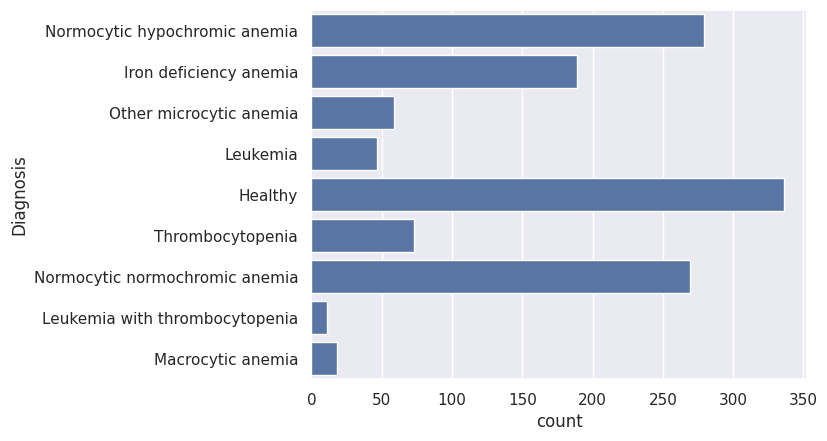

In [ ]:
sns.set_theme(style='darkgrid')
sns.countplot(data=df, y='Diagnosis')

Fazer encoding dos diagnosticos

In [ ]:
df = pd.get_dummies(df, columns=['Diagnosis'])

In [ ]:
df.columns

Index(['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV',
       'MCH', 'MCHC', 'PLT', 'PDW', 'PCT', 'Diagnosis_Healthy',
       'Diagnosis_Iron deficiency anemia', 'Diagnosis_Leukemia',
       'Diagnosis_Leukemia with thrombocytopenia',
       'Diagnosis_Macrocytic anemia',
       'Diagnosis_Normocytic hypochromic anemia',
       'Diagnosis_Normocytic normochromic anemia',
       'Diagnosis_Other microcytic anemia', 'Diagnosis_Thrombocytopenia'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   WBC                                       1281 non-null   float64
 1   LYMp                                      1281 non-null   float64
 2   NEUTp                                     1281 non-null   float64
 3   LYMn                                      1281 non-null   float64
 4   NEUTn                                     1281 non-null   float64
 5   RBC                                       1281 non-null   float64
 6   HGB                                       1281 non-null   float64
 7   HCT                                       1281 non-null   float64
 8   MCV                                       1281 non-null   float64
 9   MCH                                       1281 non-null   float64
 10  MCHC                                

# Graficos Gerais

Gráficos criados para exploração, hipóteses e testes.

In [ ]:
label_encoder = LabelEncoder()
df['diagnostico'] = label_encoder.fit_transform(df['Diagnosis'])
sns.set_theme(style='darkgrid')

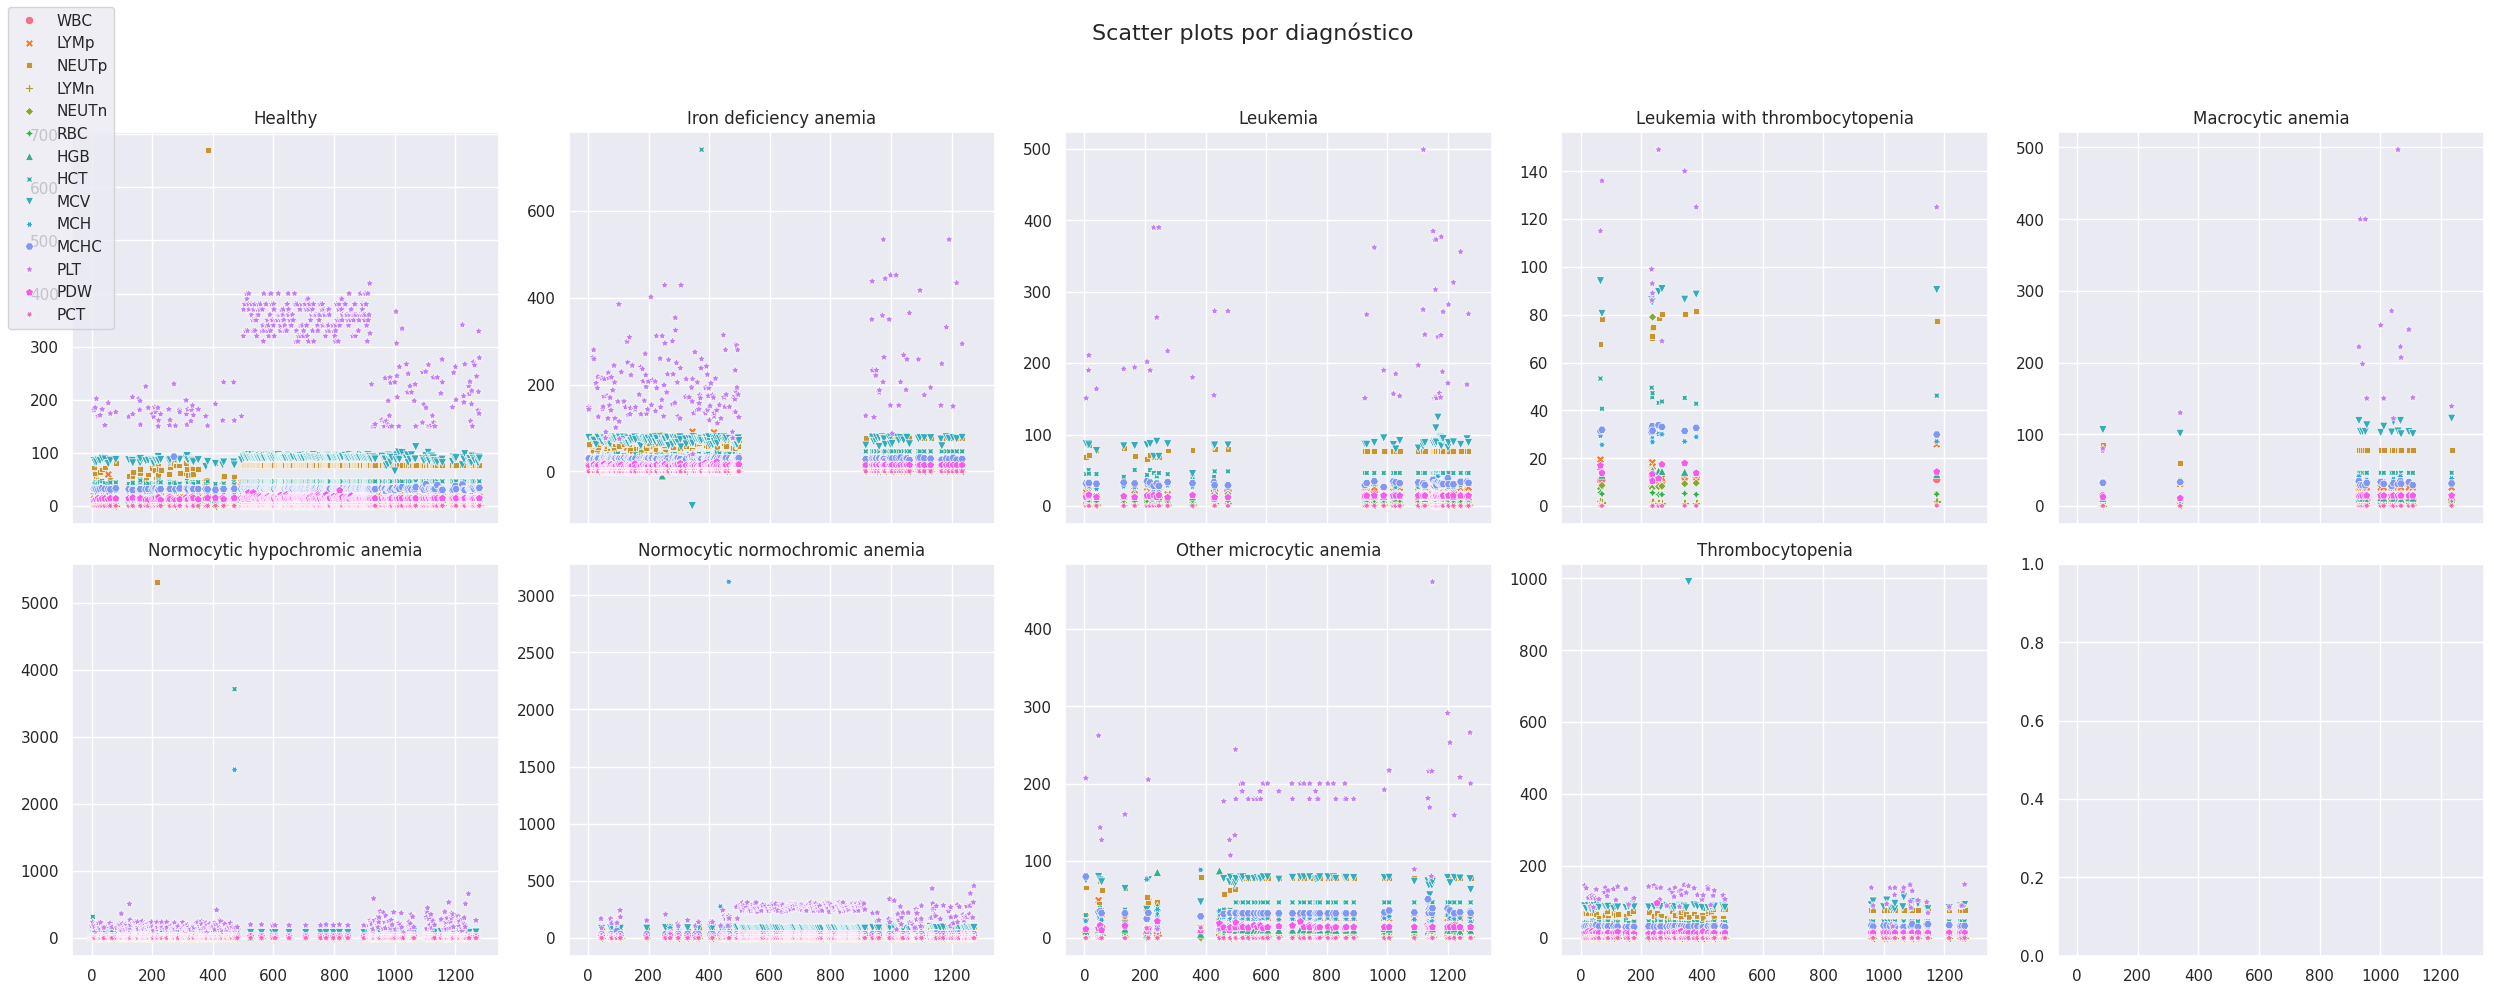

In [ ]:
# Criando o grid de subplots: 2 linhas e 5 colunas
fig, ax = plt.subplots(2, 5, sharex=True, figsize=(25, 10))
fig.suptitle('Scatter plots por diagnóstico', fontsize=16)

# Garantindo que o ax é tratado como um array 2D
ax = ax.ravel()

colunas = ['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV','MCH', 'MCHC', 'PLT', 'PDW', 'PCT']

# Subplot 1 - Diagnóstico 0
sns.scatterplot(ax=ax[0], data=df[colunas][df['diagnostico'] == 0])
ax[0].get_legend().remove()
ax[0].set_title('Healthy')

sns.scatterplot(ax=ax[1], data=df[colunas][df['diagnostico'] == 1], legend=False)
ax[1].set_title('Iron deficiency anemia')

sns.scatterplot(ax=ax[2], data=df[colunas][df['diagnostico'] == 2], legend=False)
ax[2].set_title('Leukemia')

sns.scatterplot(ax=ax[3], data=df[colunas][df['diagnostico'] == 3], legend=False)
ax[3].set_title('Leukemia with thrombocytopenia')

sns.scatterplot(ax=ax[4], data=df[colunas][df['diagnostico'] == 4], legend=False)
ax[4].set_title('Macrocytic anemia')

sns.scatterplot(ax=ax[5], data=df[colunas][df['diagnostico'] == 5], legend=False)
ax[5].set_title('Normocytic hypochromic anemia')

sns.scatterplot(ax=ax[6], data=df[colunas][df['diagnostico'] == 6], legend=False)
ax[6].set_title('Normocytic normochromic anemia')

sns.scatterplot(ax=ax[7], data=df[colunas][df['diagnostico'] == 7], legend=False)
ax[7].set_title('Other microcytic anemia')

sns.scatterplot(ax=ax[8], data=df[colunas][df['diagnostico'] == 8], legend=False)
ax[8].set_title('Thrombocytopenia')

# Ajustando o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Adicionando a legenda ao gráfico inteiro
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left')

plt.show()

In [ ]:
colunas_numericas = df.columns[:-2]  # Exclui as colunas 'Diagnosis' e 'diagnostico'

# Empilhando (stack) as colunas em uma única coluna 'variavel' e 'valor'
df_melted = df.melt(id_vars='diagnostico', value_vars=colunas_numericas,
                    var_name='variavel', value_name='valor')

diag = dict(zip(df['diagnostico'], df['Diagnosis']))
df_melted['diagnostico'] = df_melted['diagnostico'].map(diag)

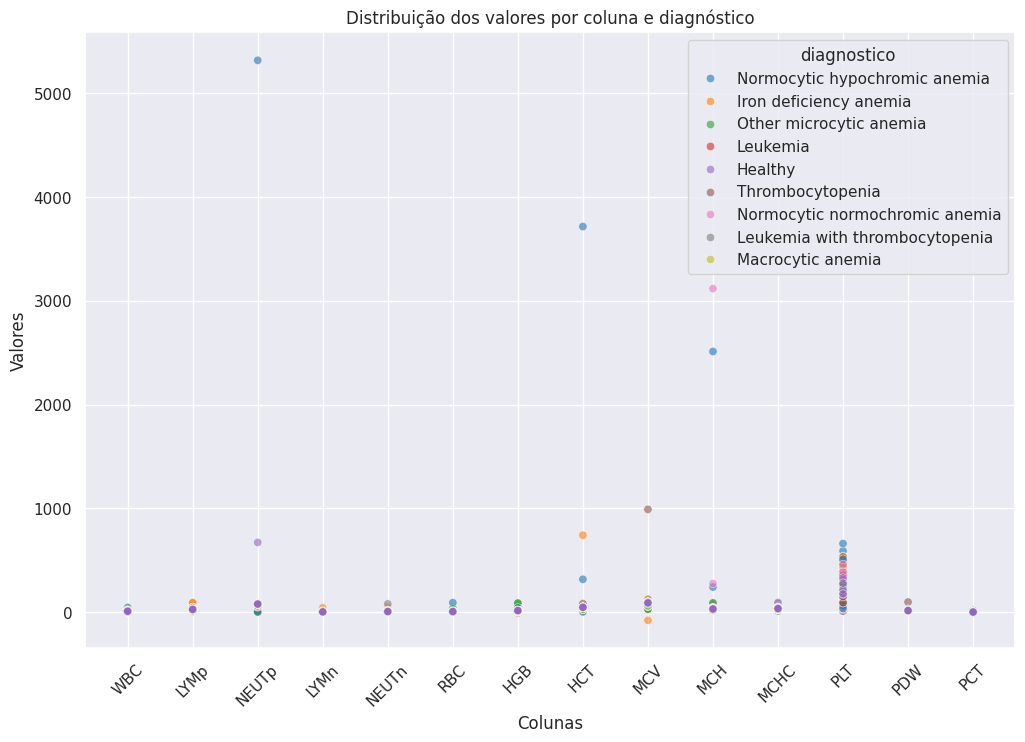

In [ ]:
# Criando o scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_melted, x='variavel', y='valor', hue='diagnostico', palette='tab10', alpha=0.6)

plt.title('Distribuição dos valores por coluna e diagnóstico')
plt.xlabel('Colunas')
plt.ylabel('Valores')
plt.xticks(rotation=45)

plt.show()


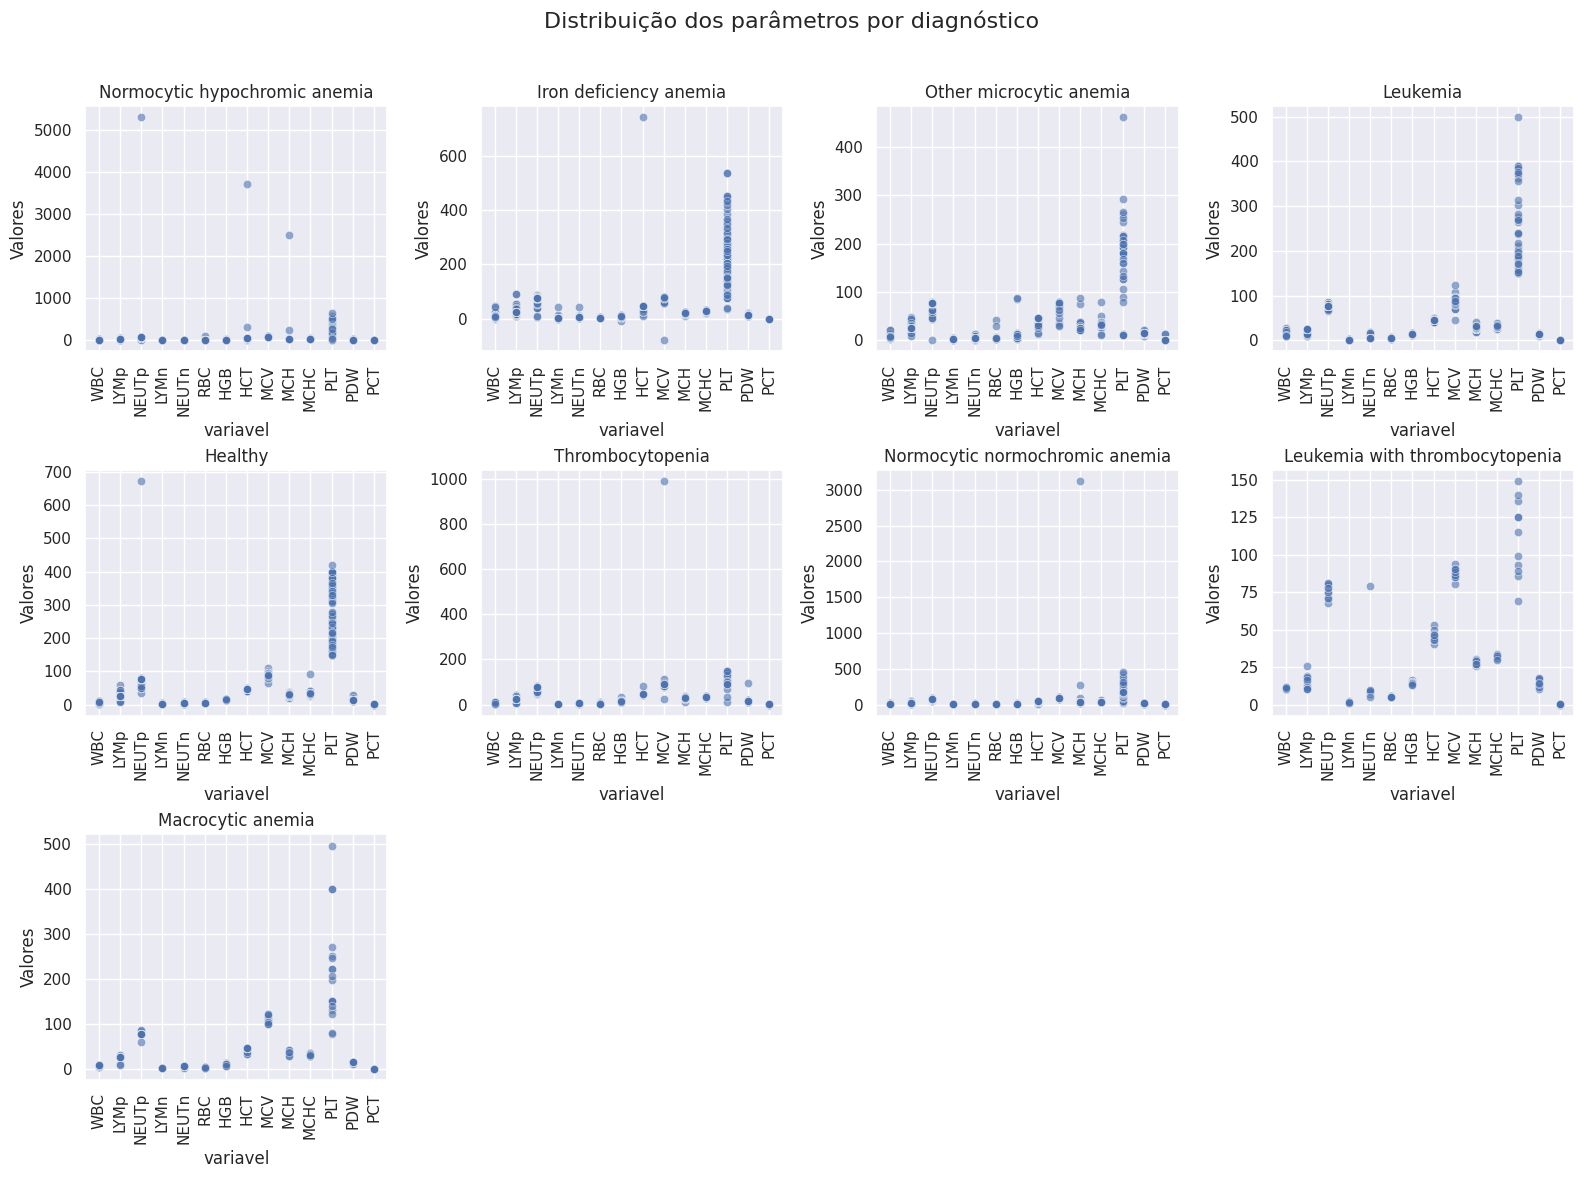

In [ ]:
#(df_melted)
diagnosticos_unicos = df_melted['diagnostico'].unique()

# Criando a figura e os eixos para os subplots
num_diagnosticos = len(diagnosticos_unicos)
num_cols = 4
num_rows = (num_diagnosticos // num_cols) + int(num_diagnosticos % num_cols != 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows), sharey=False)

# Flatten axes (em caso de apenas 1 linha)
axes = axes.flatten()

# Iterando sobre cada diagnóstico único e criando um subplot individual
for i, diagnostico in enumerate(diagnosticos_unicos):
    ax = axes[i]

    df_filtro = df_melted[df_melted['diagnostico'] == diagnostico]

    sns.scatterplot(data=df_filtro, x='variavel', y='valor', ax=ax, alpha=0.6)

    ax.set_title(f'{diagnostico}')
    ax.set_ylabel('Valores')

    ax.tick_params(axis='x', rotation=90)

# Removendo subplots vazios (se houver)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribuição dos parâmetros por diagnóstico', fontsize=16)

plt.show()


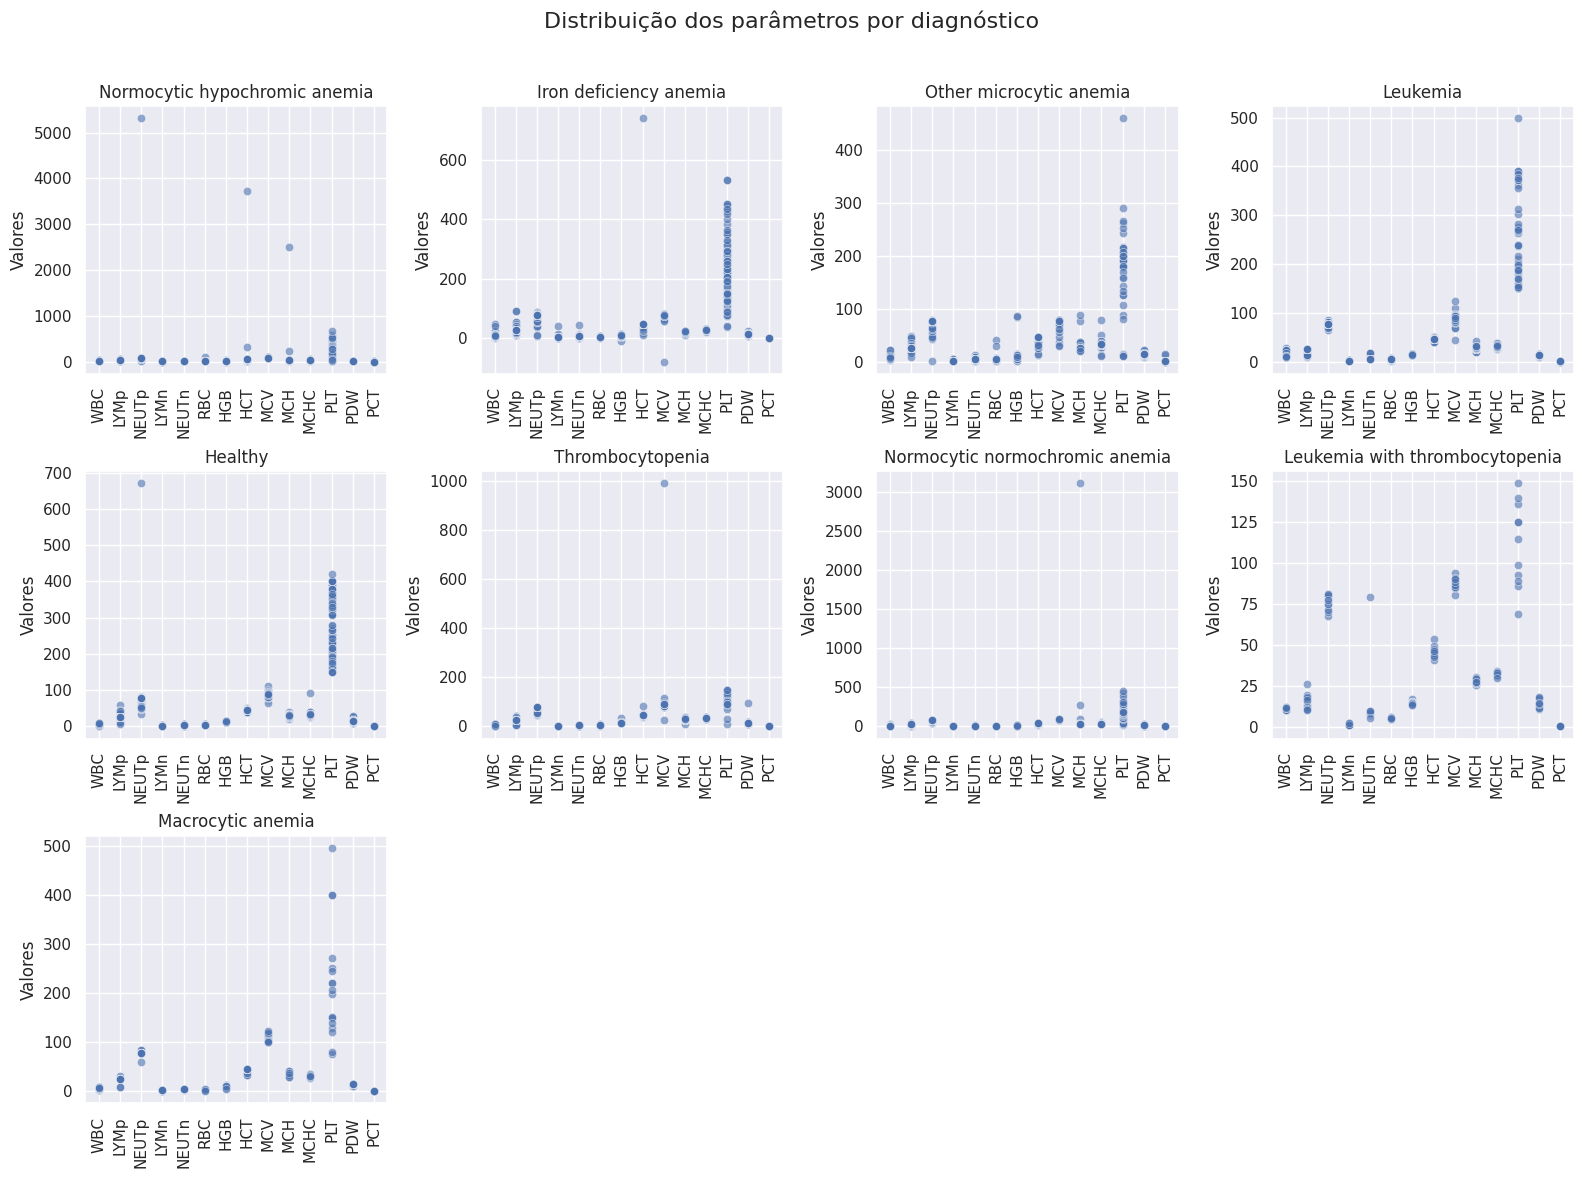

In [ ]:
diagnosticos_unicos = df_melted['diagnostico'].unique()

# Criando a figura e os eixos para os subplots
num_diagnosticos = len(diagnosticos_unicos)
num_cols = 4
num_rows = (num_diagnosticos // num_cols) + int(num_diagnosticos % num_cols != 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows), sharey=False)

# Flatten axes (em caso de apenas 1 linha)
axes = axes.flatten()

# Iterando sobre cada diagnóstico único e criando um subplot individual
for i, diagnostico in enumerate(diagnosticos_unicos):
    ax = axes[i]

    df_filtro = df_melted[df_melted['diagnostico'] == diagnostico]

    sns.scatterplot(data=df_filtro, x='variavel', y='valor', ax=ax, alpha=0.6)

    ax.set_title(f'{diagnostico}')
    ax.set_ylabel('Valores')

    # Removendo o rótulo do eixo X
    ax.set_xlabel('')

    ax.tick_params(axis='x', rotation=90)

# Removendo subplots vazios (se houver)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribuição dos parâmetros por diagnóstico', fontsize=16)

plt.show()


# Modelo

<font size= 5> Tentativas de otimização </font>

- Inicialização de pesos e vieses.
- Camadas e neuronios
- Normalizar ou não, MinMax,Stand
- Optimizer/loss/metrics
- Épocas

In [ ]:
X = df.iloc[:, :14] #Resultados
Y = df.iloc[:, 14:] #Diagnosticos

#Separação conjunto

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1024, 14)

In [ ]:
X_test.shape

(257, 14)

In [ ]:
#Nessario normalizar devido a difereças muito grande entre alguns parametros

#StdScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#MinMaxScaler()
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

#Criação do Modelo

In [ ]:
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(Y_train.shape[1], activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,337 (13.04 KB)

 Trainable params: 3,337 (13.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers[0].get_weights()

In [ ]:
pesos,bias = model.layers[0].get_weights()
print(pesos.shape)
pesos

In [ ]:
print(bias.shape)
bias

#Treinamento

##Compilando o modelo

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Treino

In [ ]:
epocas=50
historico = model.fit(X_train, Y_train, epochs=epocas, batch_size=32, validation_split=0.2)

# Avaliação

## Teste Softmax

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8080 - loss: 0.1093 
Loss: 0.1035776138305664, Accuracy: 0.8210116624832153


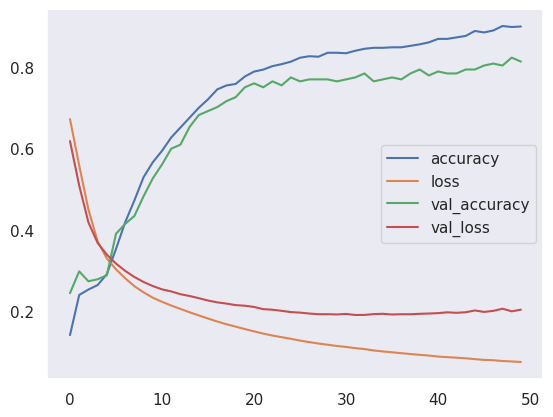

In [ ]:
pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

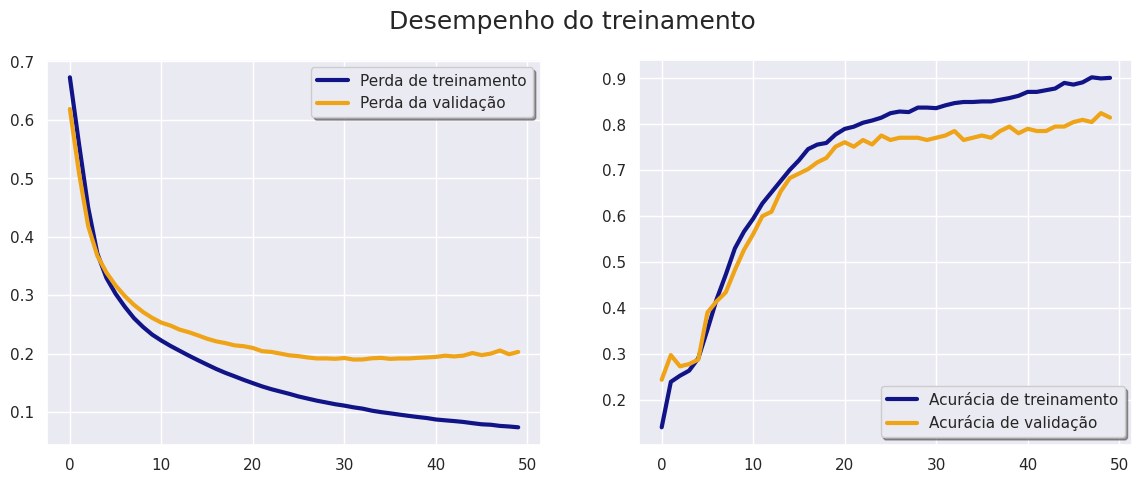

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(historico.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(historico.history['accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico.history['val_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho do treinamento', fontsize = 18)
plt.show()

## Aprendizado

In [ ]:
historico.history

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8223 - loss: 0.0934 
Loss: 0.08661733567714691, Accuracy: 0.844357967376709


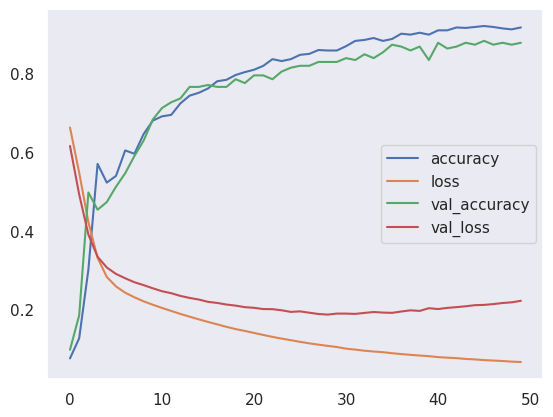

In [ ]:
pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

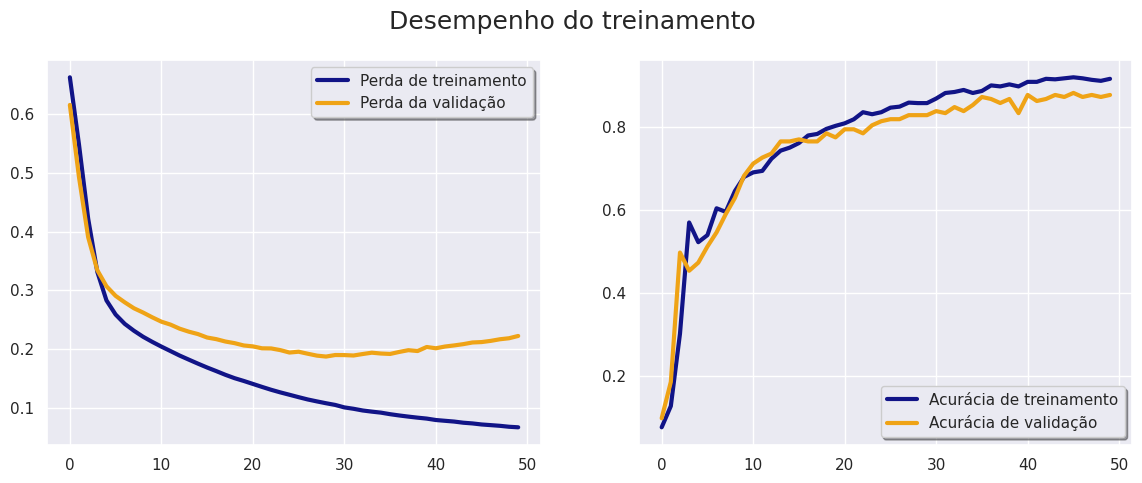

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(historico.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(historico.history['accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico.history['val_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho do treinamento', fontsize = 18)
plt.show()

## Validação Modelo.V1

Pesos e bias padrão Keras

StandScaler

epocas = 50

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8245 - loss: 0.0877 
Loss: 0.08006151020526886, Accuracy: 0.8482490181922913


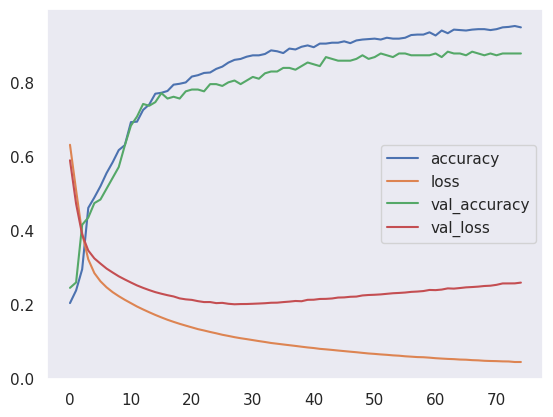

In [ ]:
pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

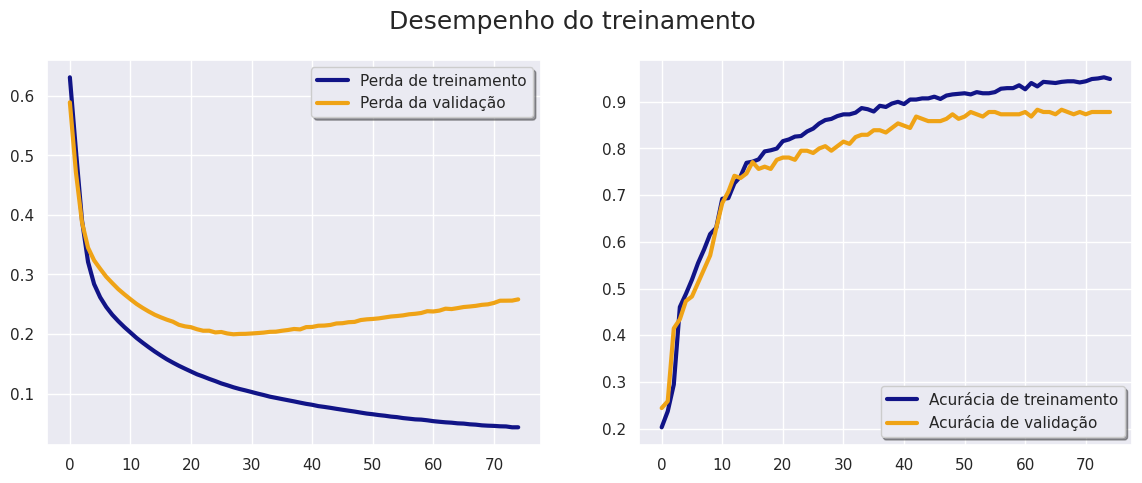

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(historico.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(historico.history['accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico.history['val_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho do treinamento', fontsize = 18)
plt.show()

## Validação Modelo.V4

Mudança do otimizador de 'adam' para 'rmsprop'

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.1075 
Loss: 0.10027003288269043, Accuracy: 0.8210116624832153


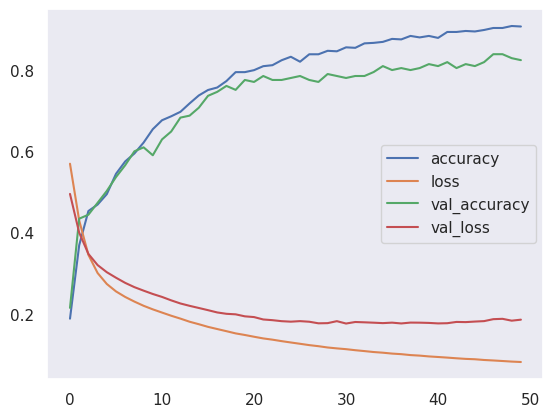

In [ ]:
pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

## Validação Modelo.V3

Pesos = random

epocas = 250

MinMaxScaler

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7268 - loss: 0.1515 
Loss: 0.14810599386692047, Accuracy: 0.7392995953559875


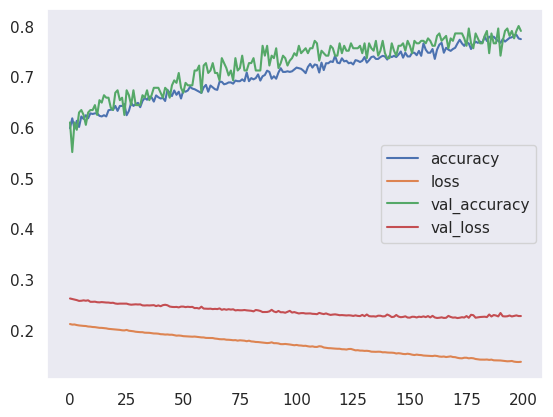

In [ ]:
pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

## Validação Modelo.V3

pesos = random

epocas = 100

StandScaler

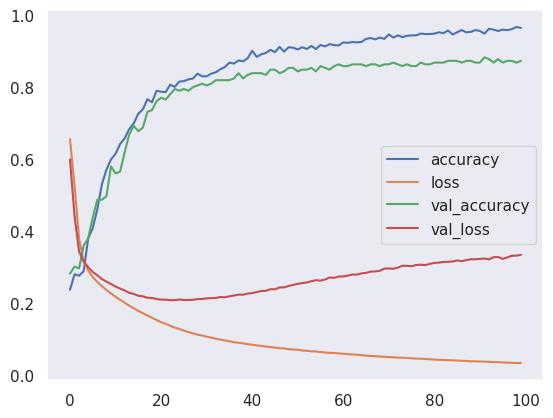

In [ ]:
pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

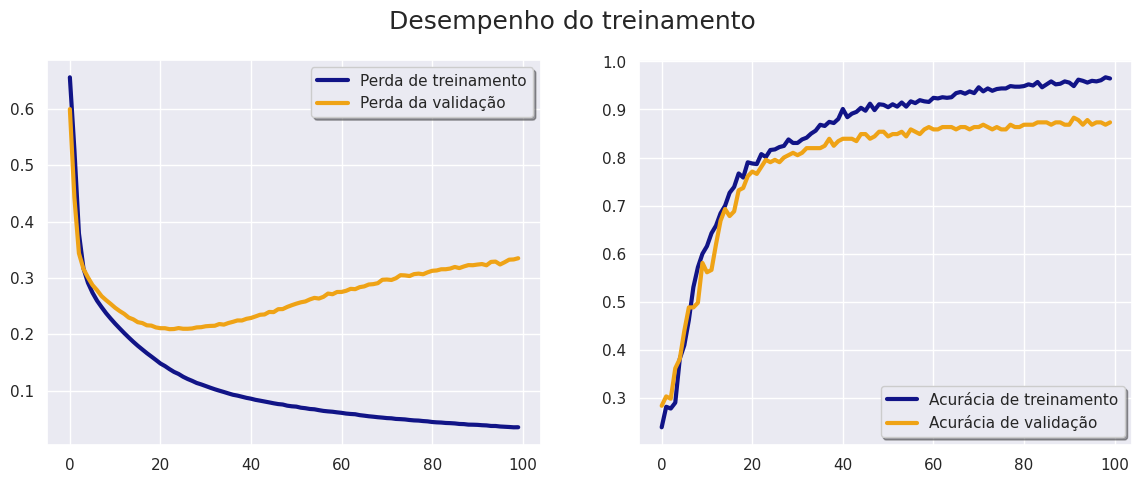

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(historico.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(historico.history['accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico.history['val_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho do treinamento', fontsize = 18)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8636 - loss: 0.0721 
Loss: 0.06625225394964218, Accuracy: 0.8832684755325317


## Validação Modelo.V2

50 epocas

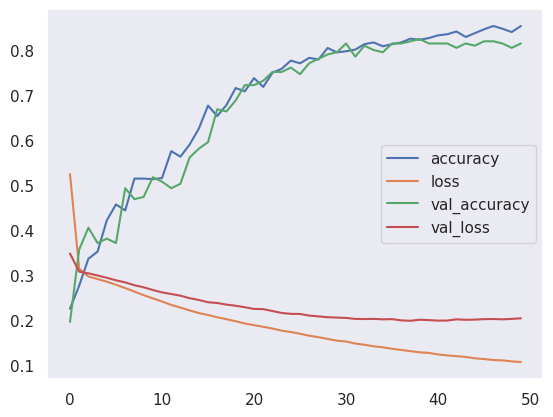

In [ ]:
pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

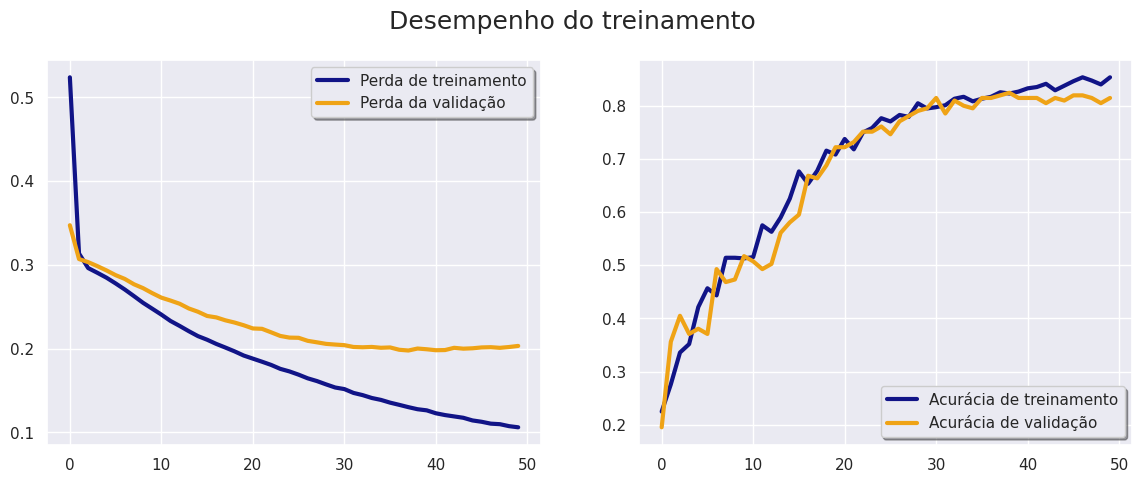

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(historico.history['loss'], color='#111487', linewidth=3, label="Perda de treinamento")
ax[0].plot(historico.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(historico.history['accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico.history['val_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho do treinamento', fontsize = 18)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7760 - loss: 0.1189 
Loss: 0.1135917529463768, Accuracy: 0.7976653575897217


## Teste

O valores utilizados como entrada no modelo foram retirados manualmente da base, não fazendo parte do projeto, de forma que eu tivesse dados que não tiveram contato com o modelo em nenhum momento.

In [ ]:
#Fazer entrada dos dados
# exame = {
#     'WBC': 2.740,   # Contagem de glóbulos brancos
#     'LYMp': 36.9,   # Porcentagem de linfócitos
#     'NEUTp': 60.0,  # Porcentagem de neutrófilos
#     'LYMn': 2.0,    # Contagem absoluta de linfócitos
#     'NEUTn': 3.5,   # Contagem absoluta de neutrófilos
#     'RBC': 4.77,    # Contagem de glóbulos vermelhos
#     'HGB': 13.5,    # Hemoglobina
#     'HCT': 39.7,    # Hematócrito
#     'MCV': 83.2,    # Volume corpuscular médio
#     'MCH': 28.3,    # Hemoglobina corpuscular média
#     'MCHC': 320.0,  # Concentração de hemoglobina corpuscular
#     'PLT': 167.0,   # Contagem de plaquetas
#     'PDW': 0.15,    # Largura de distribuição de plaquetas
#     'PCT': 0.02     # Proporção de plaquetas
# }

exame = {
    'WBC': 8.67,
    'LYMp': 25.8,
    'NEUTp': 77.5,
    'LYMn': 1.88,
    'NEUTn': 5.14,
    'RBC': 3.58,
    'HGB': 10.2,
    'HCT': 46.1,
    'MCV': 102.8,
    'MCH': 28.5,
    'MCHC': 27.7,
    'PLT': 272,
    'PDW': 14.31,
    'PCT': 0.26
}


amostra_exame = pd.DataFrame([exame])

amostra_exame_normalizada = scaler.transform(amostra_exame)

In [ ]:
# Fazer predições
predictions = model.predict(amostra_exame_normalizada)

# Converter as predições para 0 e 1
predictions = (predictions > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
predictions

array([[0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [ ]:
# Nomes das colunas de diagnóstico
diagnosis_columns = [
    'Diagnosis_Healthy', 'Diagnosis_Iron deficiency anemia',
    'Diagnosis_Leukemia', 'Diagnosis_Leukemia with thrombocytopenia',
    'Diagnosis_Macrocytic anemia', 'Diagnosis_Normocytic hypochromic anemia',
    'Diagnosis_Normocytic normochromic anemia', 'Diagnosis_Other microcytic anemia',
    'Diagnosis_Thrombocytopenia'
]

In [ ]:
# Exibir as previsões
for col, pred in zip(diagnosis_columns, predictions[0]):
    print(f"{col}: {'Positivo' if pred == 1 else 'Negativo'}")

Diagnosis_Healthy: Positivo
Diagnosis_Iron deficiency anemia: Negativo
Diagnosis_Leukemia: Negativo
Diagnosis_Leukemia with thrombocytopenia: Negativo
Diagnosis_Macrocytic anemia: Negativo
Diagnosis_Normocytic hypochromic anemia: Negativo
Diagnosis_Normocytic normochromic anemia: Negativo
Diagnosis_Other microcytic anemia: Negativo
Diagnosis_Thrombocytopenia: Negativo


In [ ]:
# Exibir as previsões
for col, pred in zip(diagnosis_columns, predictions[0]):
    print(f"{col}: {'Positivo' if pred == 1 else 'Negativo'}")

Diagnosis_Healthy: Negativo
Diagnosis_Iron deficiency anemia: Negativo
Diagnosis_Leukemia: Negativo
Diagnosis_Leukemia with thrombocytopenia: Negativo
Diagnosis_Macrocytic anemia: Negativo
Diagnosis_Normocytic hypochromic anemia: Positivo
Diagnosis_Normocytic normochromic anemia: Negativo
Diagnosis_Other microcytic anemia: Negativo
Diagnosis_Thrombocytopenia: Negativo
